In [6]:
import pandas as pd
from bs4 import BeautifulSoup
import requests
import pickle
import ydata_profiling

In [111]:
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
}#Site bizi bot olarak algılamasını önlemek için...
page=requests.get("https://www.zingat.com/kocaeli-satilik-daire", headers=headers)
soup = BeautifulSoup(page.content,"html.parser")


<!DOCTYPE html>

<html lang="tr">
<head>
<script src="/cdn-cgi/apps/head/x1Xp7i1b0NfjYso73lc3_rljQ7Y.js"></script><script type="e24769538fafbe7f36a219c3-text/javascript">window.isMobile = /Mobile|iP(hone|od|ad)|Android|BlackBerry|IEMobile/.test(navigator.userAgent);
  window.matchMobile = window.matchMedia('(max-width: 991px)').matches;
  window.tablet = window.matchMedia('(min-width:992px) and (max-width: 1200px)').matches;

</script>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="width=device-width, minimal-ui, initial-scale=1, maximum-scale=1.0, user-scalable=no" name="viewport">
<meta content="telephone=no" name="format-detection"/>
<link href="https://www.zingat.com/kocaeli-satilik-daire" rel="canonical"/>
<meta content="no-referrer-when-downgrade" name="referrer"/>
<meta content="knl5mzi7n3xgz1a271qsq7ut2upmno" name="facebook-domain-verification"><title>Kocaeli Satılık Daire Fiyatları ve İlanları - Zingat</title><meta content="Kocae
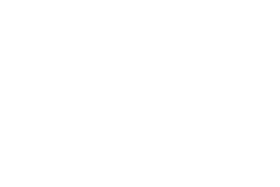
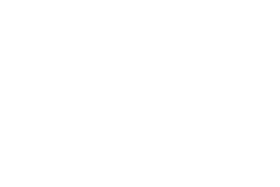
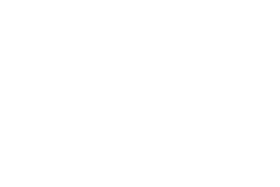
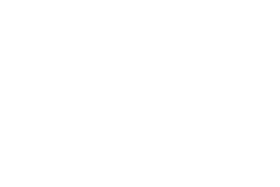
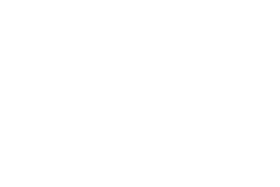
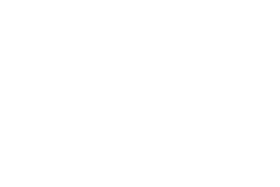
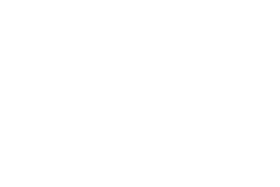
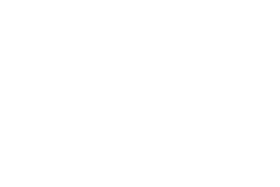
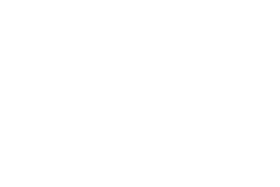
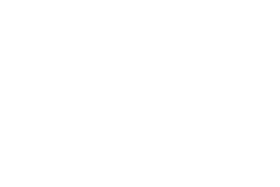
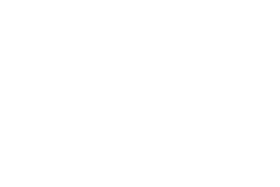
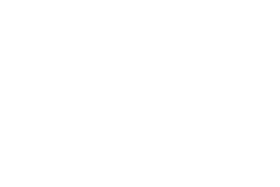
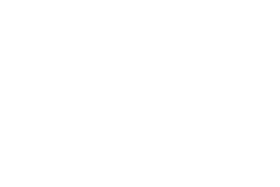
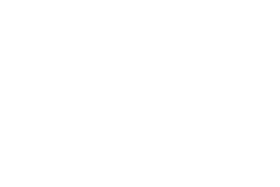
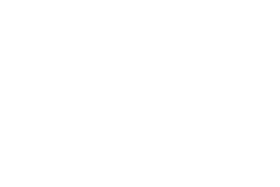
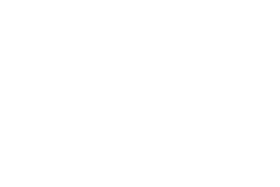
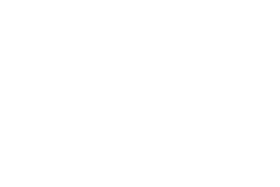
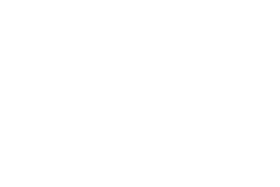
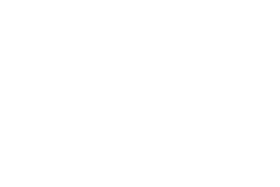
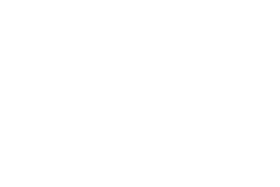
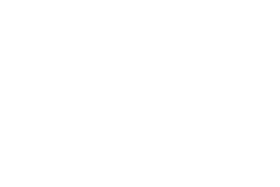
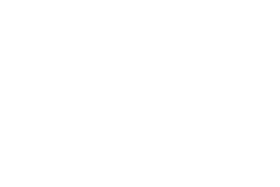
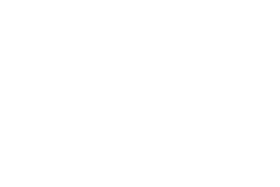
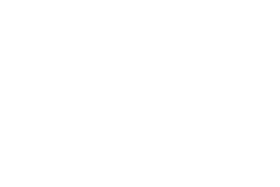
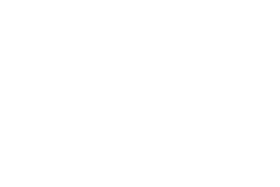
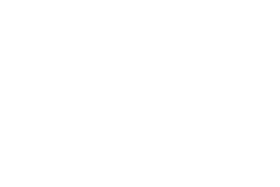
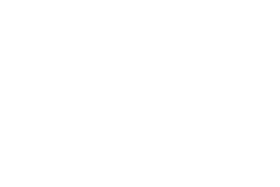
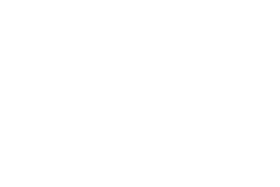
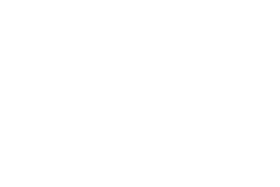
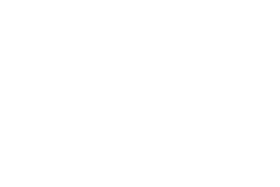
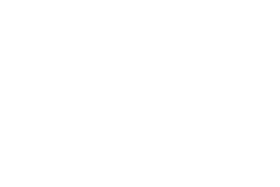
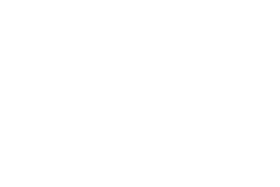
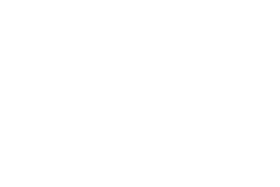
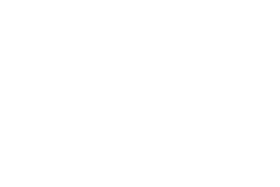
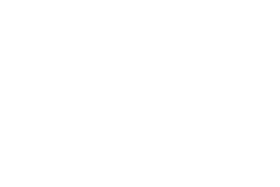
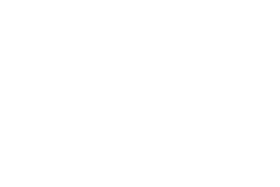
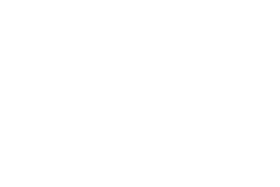
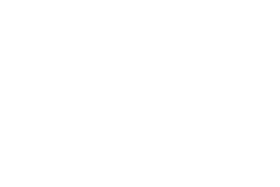
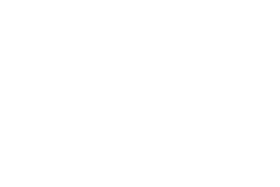
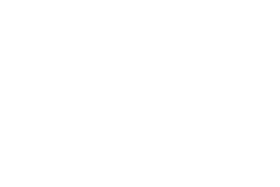
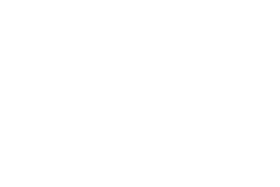
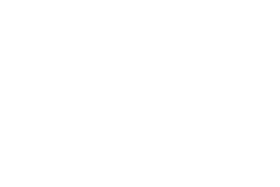
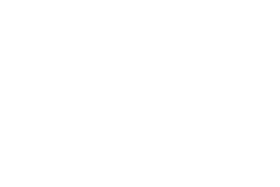
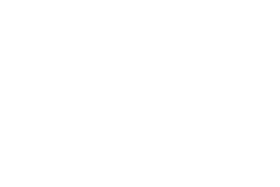
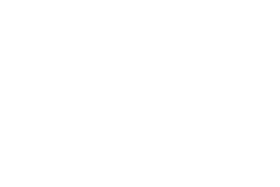
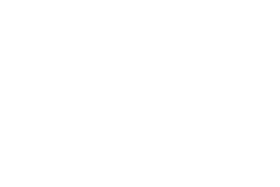
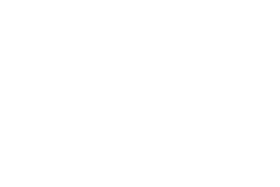
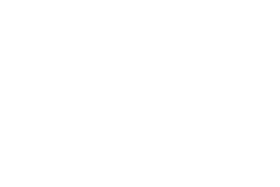
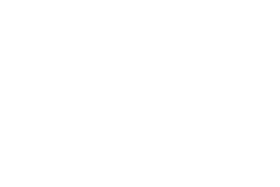
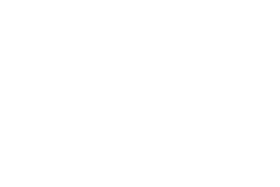
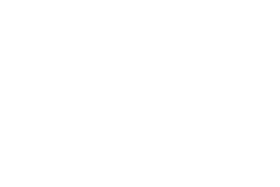
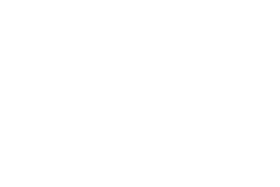
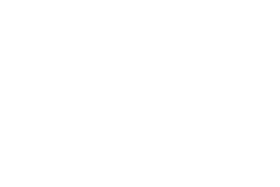
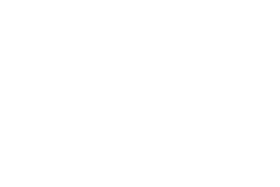
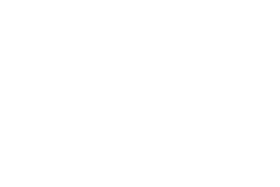
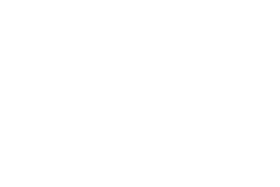
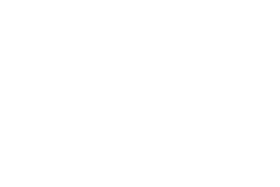
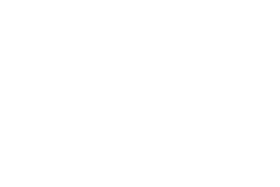
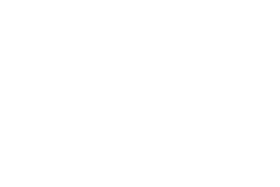
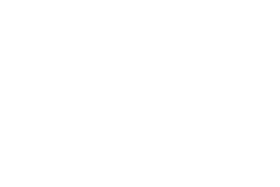
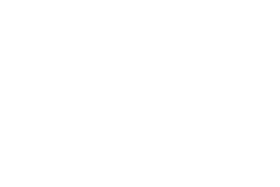
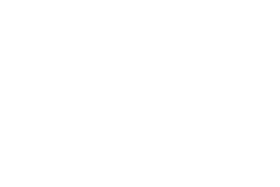
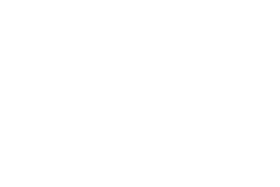
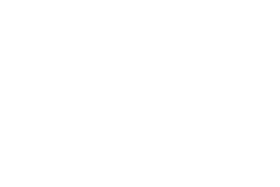
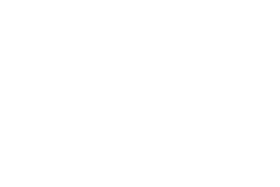
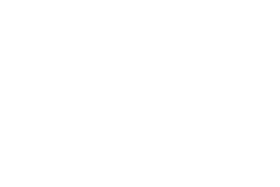
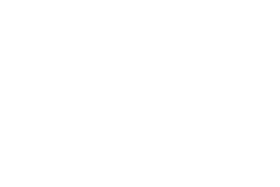
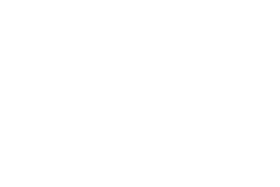
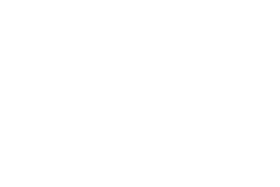
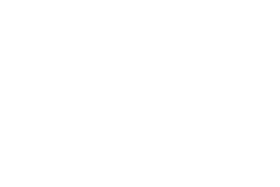
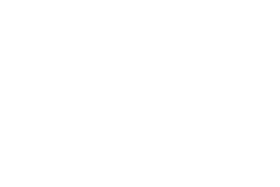
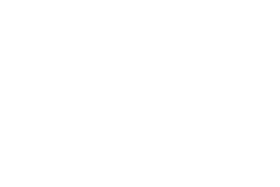
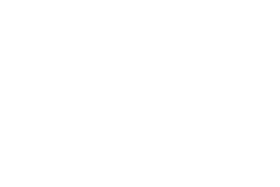
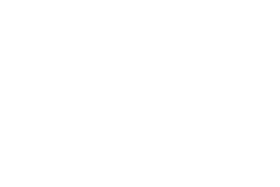
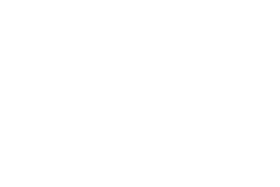
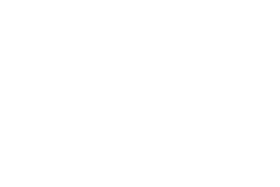
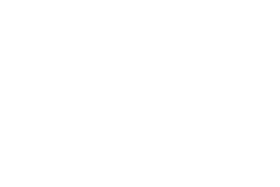
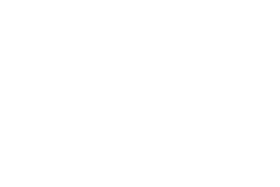
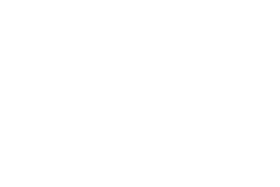
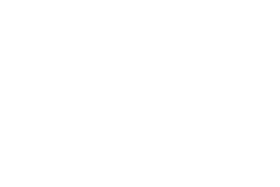
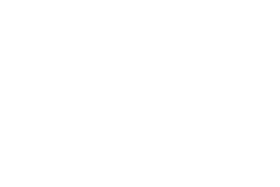
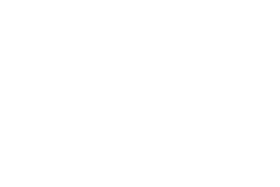
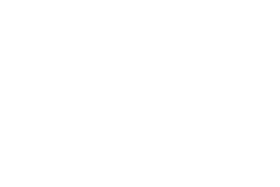
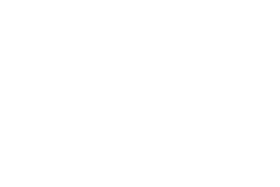
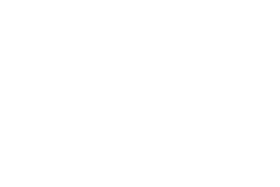
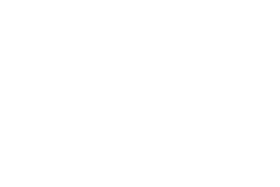
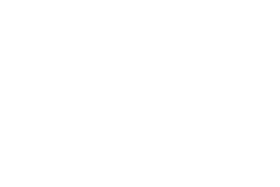
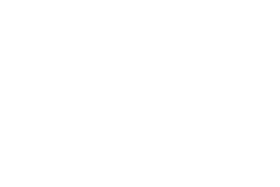
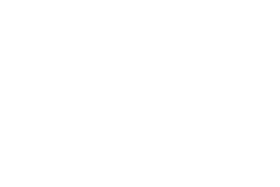
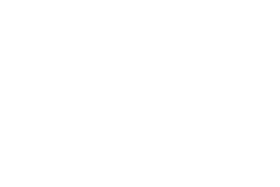
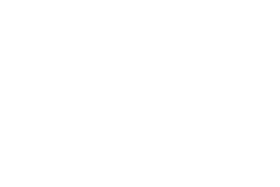
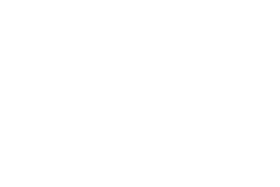
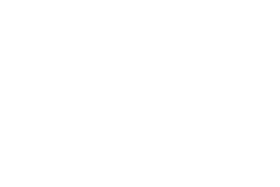
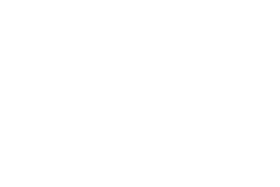
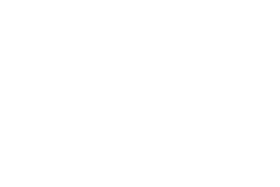
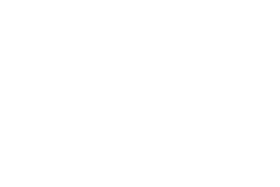
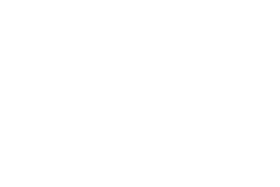
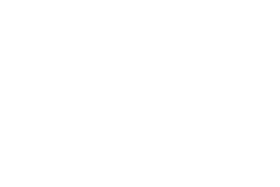
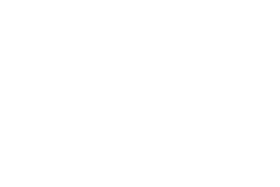
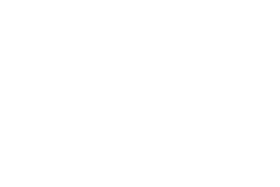
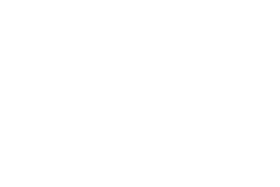
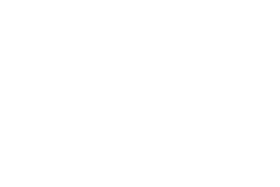
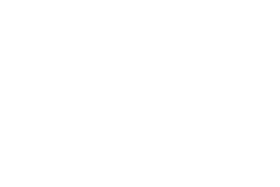
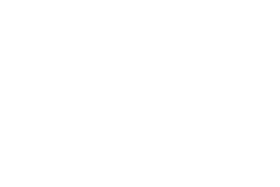

In [112]:
soup

In [113]:
master = soup.find_all("li", class_="zng-pagination-next")[0]
pager = master.find('a')
max_page = int(pager.get('data-page'))
max_page

48

In [194]:
IlanNo=[]
IlanBaslik=[]
Il=[]
Ilce=[]
Mahalle=[]
SatisFiyat=[]
BrütAlan =[]
NetAlan=[]
OdaSayisi =[]
SalonSayisi =[]
BanyoSayisi =[]
BinaYasi = []
BinaKatSayisi = []
BinaBulunduguYer = []
IsitmaTipi = []
KiraGetiri =[]
count=0
for x in range(max_page):
    page_link = "https://www.zingat.com/kocaeli-satilik-daire?page="+str(x+1)
    page2=requests.get(page_link, headers=headers)
    soup2 = BeautifulSoup(page2.content,"html.parser")
    linkler=soup2.find_all('li',{'class':'zl-card'})
    for link in linkler:
        count= count + 1
        detail_link = link.find('a',{'class':'zl-card-inner'})
        basliklar.append(detail_link.get('title'))
        detail_link_address =  "https://www.zingat.com/"+detail_link.get('href')
        page3=requests.get(detail_link_address, headers=headers)
        soup3 = BeautifulSoup(page3.content,"html.parser")
        header = soup3.find('div',{'class':'auction-id'})
        AdvertID = header.find('label',{'id':'seo_ProductID'}).text
        AdvertTitle = header.find('label',{'id':'seo_ProductTitle'}).text
        SalesPrice = header.find('label',{'id':'seo_ProductPriceAmount'}).text
        GrossArea = header.find('label',{'id':'seo_ProductSize'}).text
        Location = header.find('label',{'id':'seo_ProductLocPath'}).text.split("/")
        RoomCount = header.find('label',{'id':'seo_ProductRoomSlug'}).text.split("+")

        detail_info = soup3.find('ul',{'class':'attribute-detail-list'})
        detail_info_objects = detail_info.find_all('li')
        IlanNo.append(AdvertID)
        IlanBaslik.append(AdvertTitle)
        Il.append(Location[0])
        Ilce.append(Location[1])
        Mahalle.append(Location[2])
        BrütAlan.append(GrossArea)
        OdaSayisi.append(RoomCount[0])
        SalonSayisi.append(RoomCount[1])
        SatisFiyat.append(SalesPrice)
        
        
        for detail_info_object in detail_info_objects: 
            try:
                if detail_info_object.find('strong').text == "Net m²":
                    NetAlan.append(detail_info_object.find('span').text)
                elif detail_info_object.find('strong').text == "Banyo Sayısı":
                    BanyoSayisi.append(detail_info_object.find('span').text)
                elif detail_info_object.find('strong').text == "Binadaki Kat Sayısı":
                    BinaKatSayisi.append(detail_info_object.find('span').text)
                elif detail_info_object.find('strong').text == "Isıtma Tipi":
                    IsitmaTipi.append(detail_info_object.find('span').text)
                elif detail_info_object.find('strong').text == "Bulunduğu Kat":
                    BinaBulunduguYer.append(detail_info_object.find('span').text)
                elif detail_info_object.find('strong').text == "Bina Yaşı":
                    BinaYasi.append(detail_info_object.find('span').text)
            except Exception as e: 
                print('Failed to upload to ftp: %s', e)

        # Eğer bir özellik bulunmuyorsa, boş değeri ekleyin
        if len(NetAlan) < count:
            NetAlan.append('')
        if len(BanyoSayisi) < count:
            BanyoSayisi.append('')
        if len(BinaKatSayisi) < count:
            BinaKatSayisi.append('')
        if len(IsitmaTipi) < count:
            IsitmaTipi.append('')
        if len(BinaBulunduguYer) < count:
            BinaBulunduguYer.append('')
        if len(BinaYasi) < count:
            BinaYasi.append('')
                
        

Failed to upload to ftp: %s 'NoneType' object has no attribute 'text'
Failed to upload to ftp: %s 'NoneType' object has no attribute 'text'
Failed to upload to ftp: %s 'NoneType' object has no attribute 'text'
Failed to upload to ftp: %s 'NoneType' object has no attribute 'text'
Failed to upload to ftp: %s 'NoneType' object has no attribute 'text'
Failed to upload to ftp: %s 'NoneType' object has no attribute 'text'
Failed to upload to ftp: %s 'NoneType' object has no attribute 'text'
Failed to upload to ftp: %s 'NoneType' object has no attribute 'text'
Failed to upload to ftp: %s 'NoneType' object has no attribute 'text'
Failed to upload to ftp: %s 'NoneType' object has no attribute 'text'
Failed to upload to ftp: %s 'NoneType' object has no attribute 'text'
Failed to upload to ftp: %s 'NoneType' object has no attribute 'text'
Failed to upload to ftp: %s 'NoneType' object has no attribute 'text'
Failed to upload to ftp: %s 'NoneType' object has no attribute 'text'
Failed to upload to 

Failed to upload to ftp: %s 'NoneType' object has no attribute 'text'
Failed to upload to ftp: %s 'NoneType' object has no attribute 'text'
Failed to upload to ftp: %s 'NoneType' object has no attribute 'text'
Failed to upload to ftp: %s 'NoneType' object has no attribute 'text'
Failed to upload to ftp: %s 'NoneType' object has no attribute 'text'
Failed to upload to ftp: %s 'NoneType' object has no attribute 'text'
Failed to upload to ftp: %s 'NoneType' object has no attribute 'text'
Failed to upload to ftp: %s 'NoneType' object has no attribute 'text'
Failed to upload to ftp: %s 'NoneType' object has no attribute 'text'
Failed to upload to ftp: %s 'NoneType' object has no attribute 'text'
Failed to upload to ftp: %s 'NoneType' object has no attribute 'text'
Failed to upload to ftp: %s 'NoneType' object has no attribute 'text'
Failed to upload to ftp: %s 'NoneType' object has no attribute 'text'
Failed to upload to ftp: %s 'NoneType' object has no attribute 'text'
Failed to upload to 

Failed to upload to ftp: %s 'NoneType' object has no attribute 'text'
Failed to upload to ftp: %s 'NoneType' object has no attribute 'text'
Failed to upload to ftp: %s 'NoneType' object has no attribute 'text'
Failed to upload to ftp: %s 'NoneType' object has no attribute 'text'
Failed to upload to ftp: %s 'NoneType' object has no attribute 'text'
Failed to upload to ftp: %s 'NoneType' object has no attribute 'text'
Failed to upload to ftp: %s 'NoneType' object has no attribute 'text'
Failed to upload to ftp: %s 'NoneType' object has no attribute 'text'
Failed to upload to ftp: %s 'NoneType' object has no attribute 'text'
Failed to upload to ftp: %s 'NoneType' object has no attribute 'text'
Failed to upload to ftp: %s 'NoneType' object has no attribute 'text'
Failed to upload to ftp: %s 'NoneType' object has no attribute 'text'
Failed to upload to ftp: %s 'NoneType' object has no attribute 'text'
Failed to upload to ftp: %s 'NoneType' object has no attribute 'text'
Failed to upload to 

Failed to upload to ftp: %s 'NoneType' object has no attribute 'text'
Failed to upload to ftp: %s 'NoneType' object has no attribute 'text'
Failed to upload to ftp: %s 'NoneType' object has no attribute 'text'
Failed to upload to ftp: %s 'NoneType' object has no attribute 'text'
Failed to upload to ftp: %s 'NoneType' object has no attribute 'text'
Failed to upload to ftp: %s 'NoneType' object has no attribute 'text'
Failed to upload to ftp: %s 'NoneType' object has no attribute 'text'
Failed to upload to ftp: %s 'NoneType' object has no attribute 'text'
Failed to upload to ftp: %s 'NoneType' object has no attribute 'text'
Failed to upload to ftp: %s 'NoneType' object has no attribute 'text'
Failed to upload to ftp: %s 'NoneType' object has no attribute 'text'
Failed to upload to ftp: %s 'NoneType' object has no attribute 'text'
Failed to upload to ftp: %s 'NoneType' object has no attribute 'text'
Failed to upload to ftp: %s 'NoneType' object has no attribute 'text'
Failed to upload to 

Failed to upload to ftp: %s 'NoneType' object has no attribute 'text'
Failed to upload to ftp: %s 'NoneType' object has no attribute 'text'
Failed to upload to ftp: %s 'NoneType' object has no attribute 'text'
Failed to upload to ftp: %s 'NoneType' object has no attribute 'text'
Failed to upload to ftp: %s 'NoneType' object has no attribute 'text'
Failed to upload to ftp: %s 'NoneType' object has no attribute 'text'
Failed to upload to ftp: %s 'NoneType' object has no attribute 'text'
Failed to upload to ftp: %s 'NoneType' object has no attribute 'text'
Failed to upload to ftp: %s 'NoneType' object has no attribute 'text'
Failed to upload to ftp: %s 'NoneType' object has no attribute 'text'
Failed to upload to ftp: %s 'NoneType' object has no attribute 'text'
Failed to upload to ftp: %s 'NoneType' object has no attribute 'text'
Failed to upload to ftp: %s 'NoneType' object has no attribute 'text'
Failed to upload to ftp: %s 'NoneType' object has no attribute 'text'
Failed to upload to 

Failed to upload to ftp: %s 'NoneType' object has no attribute 'text'
Failed to upload to ftp: %s 'NoneType' object has no attribute 'text'
Failed to upload to ftp: %s 'NoneType' object has no attribute 'text'
Failed to upload to ftp: %s 'NoneType' object has no attribute 'text'
Failed to upload to ftp: %s 'NoneType' object has no attribute 'text'
Failed to upload to ftp: %s 'NoneType' object has no attribute 'text'
Failed to upload to ftp: %s 'NoneType' object has no attribute 'text'
Failed to upload to ftp: %s 'NoneType' object has no attribute 'text'
Failed to upload to ftp: %s 'NoneType' object has no attribute 'text'
Failed to upload to ftp: %s 'NoneType' object has no attribute 'text'
Failed to upload to ftp: %s 'NoneType' object has no attribute 'text'
Failed to upload to ftp: %s 'NoneType' object has no attribute 'text'
Failed to upload to ftp: %s 'NoneType' object has no attribute 'text'
Failed to upload to ftp: %s 'NoneType' object has no attribute 'text'
Failed to upload to 

Failed to upload to ftp: %s 'NoneType' object has no attribute 'text'
Failed to upload to ftp: %s 'NoneType' object has no attribute 'text'
Failed to upload to ftp: %s 'NoneType' object has no attribute 'text'
Failed to upload to ftp: %s 'NoneType' object has no attribute 'text'
Failed to upload to ftp: %s 'NoneType' object has no attribute 'text'
Failed to upload to ftp: %s 'NoneType' object has no attribute 'text'
Failed to upload to ftp: %s 'NoneType' object has no attribute 'text'
Failed to upload to ftp: %s 'NoneType' object has no attribute 'text'
Failed to upload to ftp: %s 'NoneType' object has no attribute 'text'
Failed to upload to ftp: %s 'NoneType' object has no attribute 'text'
Failed to upload to ftp: %s 'NoneType' object has no attribute 'text'
Failed to upload to ftp: %s 'NoneType' object has no attribute 'text'
Failed to upload to ftp: %s 'NoneType' object has no attribute 'text'
Failed to upload to ftp: %s 'NoneType' object has no attribute 'text'
Failed to upload to 

In [195]:
df=pd.DataFrame(columns=['IlanNo','IlanBaslik','Il','Ilce','Mahalle','BrütAlan','NetAlan','OdaSayisi','SalonSayisi','BinaYasi','BinaKatSayisi','BinaBulunduguYer','SatisFiyat'])

In [196]:
#Arraylerin Dataframe aktarılması
df['IlanNo'] = IlanNo 
df['IlanBaslik'] = IlanBaslik
df['Il'] = Il 
df['Ilce'] = Ilce 
df['Mahalle'] = Mahalle 
df['BrütAlan'] = BrütAlan 
df['NetAlan'] = NetAlan 
df['OdaSayisi'] = OdaSayisi 
df['SalonSayisi'] = SalonSayisi
df['SatisFiyat'] = SatisFiyat 
df['BinaYasi'] = BinaYasi 
df['BinaKatSayisi'] = BinaKatSayisi 
df['BinaBulunduguYer'] = BinaBulunduguYer


In [197]:
df

IlanNo                                         IlanBaslik       Il  \
0     4916932  KENT KONUT 2. ETAPTA KREDİYE UYGUN GENİŞ TİP 2...  Kocaeli   
1     4806221  KOCAELİ GEBZE DE LÜKS LÜKS SİTE İÇİNDE 3+1 DUB...  Kocaeli   
2     4916798  TUANA 3.ETAPTA DENİZ MANZARALI EBEVEYN BANYOLU...  Kocaeli   
3     4913991  KÖRFEZ GÜNEY MAHALLESİNDE SATILIK 4+1 ÇATI DUB...  Kocaeli   
4     4916761  REMAX DREAM'DEN KARCİTY SİTESİNDE 1+1 SATILIK ...  Kocaeli   
...       ...                                                ...      ...   
1003  4928034  DARICA EMEK MAH ÇİFT TERASLI GÜNEY CEPHE 5+1 D...  Kocaeli   
1004  4552692          KARAMURSEL'de DENİZE 50 METRE SIFIR DAİRE  Kocaeli   
1005  4928050  DARICA CAMİ MAH.METRONUN DİBİNDE GENİŞ TERASLI...  Kocaeli   
1006  4927442  WERA'DAN ÇAYIROVA'DA SATILIK 2+1 ÜST DUBLEKS D...  Kocaeli   
1007  4928061  DARICA EMEK MAH.GÜNEY CEPHE 3+1 GENİŞ ARA KAT ...  Kocaeli   

            Ilce              Mahalle BrütAlan NetAlan OdaSayisi SalonSayisi  \
0          İzmit           28 Haziran      105      95        2            1   
1          Gebze           Cumhuriyet      225     175        3            1   
2          İzmit             Topçular      175     128        3            1   
3         Körfez                Güney      185     170        4            1   
4        Kartepe  Fatih Sultan Mehmet       50      45        1            1   
...          ...                  ...      ...     ...       ...         ...   
1003      Darıca                 Emek      240     200        5            1   
1004  Karamürsel               Ereğli       90      72        2            1   
1005      Darıca                 Cami      230     200        3            1   
1006    Çayırova                İnönü      140     110        2            1   
1007      Darıca                 Emek      120     105        3            1   

           BinaYasi  BinaKatSayisi BinaBulunduguYer SatisFiyat  
0     \n11-15 arası            \n9              \n9    2060000  
1      \n6-10 arası            \n4              \n4    6000000  
2               \n1  \n10-20 arası             \n12    6690000  
3      \n6-10 arası            \n2              \n2    2300000  
4      \n6-10 arası            \n4     \nBahçe katı    1540000  
...             ...            ...              ...        ...  
1003            \n0            \n3              \n3    3750000  
1004            \n1            \n4     \nGiriş Katı    2500000  
1005            \n2            \n3              \n3    4300000  
1006            \n0            \n3              \n3    1980000  
1007            \n0            \n3              \n2    2850000  

[1008 rows x 13 columns]

In [198]:
df = df.replace('\n', '', regex=True) #Satırlardaki \n ifadesini kaldırıyoruz

In [199]:
df

IlanNo                                         IlanBaslik       Il  \
0     4916932  KENT KONUT 2. ETAPTA KREDİYE UYGUN GENİŞ TİP 2...  Kocaeli   
1     4806221  KOCAELİ GEBZE DE LÜKS LÜKS SİTE İÇİNDE 3+1 DUB...  Kocaeli   
2     4916798  TUANA 3.ETAPTA DENİZ MANZARALI EBEVEYN BANYOLU...  Kocaeli   
3     4913991  KÖRFEZ GÜNEY MAHALLESİNDE SATILIK 4+1 ÇATI DUB...  Kocaeli   
4     4916761  REMAX DREAM'DEN KARCİTY SİTESİNDE 1+1 SATILIK ...  Kocaeli   
...       ...                                                ...      ...   
1003  4928034  DARICA EMEK MAH ÇİFT TERASLI GÜNEY CEPHE 5+1 D...  Kocaeli   
1004  4552692          KARAMURSEL'de DENİZE 50 METRE SIFIR DAİRE  Kocaeli   
1005  4928050  DARICA CAMİ MAH.METRONUN DİBİNDE GENİŞ TERASLI...  Kocaeli   
1006  4927442  WERA'DAN ÇAYIROVA'DA SATILIK 2+1 ÜST DUBLEKS D...  Kocaeli   
1007  4928061  DARICA EMEK MAH.GÜNEY CEPHE 3+1 GENİŞ ARA KAT ...  Kocaeli   

            Ilce              Mahalle BrütAlan NetAlan OdaSayisi SalonSayisi  \
0          İzmit           28 Haziran      105      95        2            1   
1          Gebze           Cumhuriyet      225     175        3            1   
2          İzmit             Topçular      175     128        3            1   
3         Körfez                Güney      185     170        4            1   
4        Kartepe  Fatih Sultan Mehmet       50      45        1            1   
...          ...                  ...      ...     ...       ...         ...   
1003      Darıca                 Emek      240     200        5            1   
1004  Karamürsel               Ereğli       90      72        2            1   
1005      Darıca                 Cami      230     200        3            1   
1006    Çayırova                İnönü      140     110        2            1   
1007      Darıca                 Emek      120     105        3            1   

         BinaYasi BinaKatSayisi BinaBulunduguYer SatisFiyat  
0     11-15 arası             9                9    2060000  
1      6-10 arası             4                4    6000000  
2               1   10-20 arası               12    6690000  
3      6-10 arası             2                2    2300000  
4      6-10 arası             4       Bahçe katı    1540000  
...           ...           ...              ...        ...  
1003            0             3                3    3750000  
1004            1             4       Giriş Katı    2500000  
1005            2             3                3    4300000  
1006            0             3                3    1980000  
1007            0             3                2    2850000  

[1008 rows x 13 columns]

In [202]:
df.to_pickle('house_zingat.pkl')

In [204]:
df.profile_report()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [4]:
#Auto ML İle Fiyat Tahmini Yapalım..
from pycaret.regression import* #Kütüphaneyi Yükleyelim

In [10]:
df=pd.read_pickle("house_zingat.pkl")#Pkl dosyasıyla saklamış olduğumuz veriyi çağrıyoruz

In [11]:
#Veriyi Hazırlayalım..
#Verimizde İlan No , İlan başlığına ve Il İhtiyaç Yok..
df = df.drop(['IlanNo', 'IlanBaslik','Il'],axis=1)

In [12]:
df.head()

Ilce              Mahalle BrütAlan NetAlan OdaSayisi SalonSayisi  \
0    İzmit           28 Haziran      105      95        2            1   
1    Gebze           Cumhuriyet      225     175        3            1   
2    İzmit             Topçular      175     128        3            1   
3   Körfez                Güney      185     170        4            1   
4  Kartepe  Fatih Sultan Mehmet       50      45        1            1   

      BinaYasi BinaKatSayisi BinaBulunduguYer SatisFiyat  
0  11-15 arası             9                9    2060000  
1   6-10 arası             4                4    6000000  
2            1   10-20 arası               12    6690000  
3   6-10 arası             2                2    2300000  
4   6-10 arası             4       Bahçe katı    1540000

In [13]:
#Boş veri varmı kontrol edelim
df.isnull().sum()

Ilce                0
Mahalle             0
BrütAlan            0
NetAlan             0
OdaSayisi           0
SalonSayisi         0
BinaYasi            0
BinaKatSayisi       0
BinaBulunduguYer    0
SatisFiyat          0
dtype: int64

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1008 entries, 0 to 1007
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Ilce              1008 non-null   object
 1   Mahalle           1008 non-null   object
 2   BrütAlan          1008 non-null   object
 3   NetAlan           1008 non-null   object
 4   OdaSayisi         1008 non-null   object
 5   SalonSayisi       1008 non-null   object
 6   BinaYasi          1008 non-null   object
 7   BinaKatSayisi     1008 non-null   object
 8   BinaBulunduguYer  1008 non-null   object
 9   SatisFiyat        1008 non-null   object
dtypes: object(10)
memory usage: 78.9+ KB


In [33]:
df['BrütAlan'] = df['BrütAlan'].astype(int)
df['NetAlan'] = df['NetAlan'].astype(int)
df['OdaSayisi'] = df['OdaSayisi'].astype(int)
df['SalonSayisi'] = df['SalonSayisi'].astype(int)
df['SatisFiyat'] = df['SatisFiyat'].astype(int)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1008 entries, 0 to 1007
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Ilce              1008 non-null   object
 1   Mahalle           1008 non-null   object
 2   BrütAlan          1008 non-null   int32 
 3   NetAlan           1008 non-null   int32 
 4   OdaSayisi         1008 non-null   int32 
 5   SalonSayisi       1008 non-null   int32 
 6   BinaYasi          1008 non-null   object
 7   BinaKatSayisi     1008 non-null   object
 8   BinaBulunduguYer  1008 non-null   object
 9   SatisFiyat        1008 non-null   int32 
dtypes: int32(5), object(5)
memory usage: 59.2+ KB


In [35]:
setup(data=df,target='SatisFiyat')

In [36]:
best_model  =compare_models()

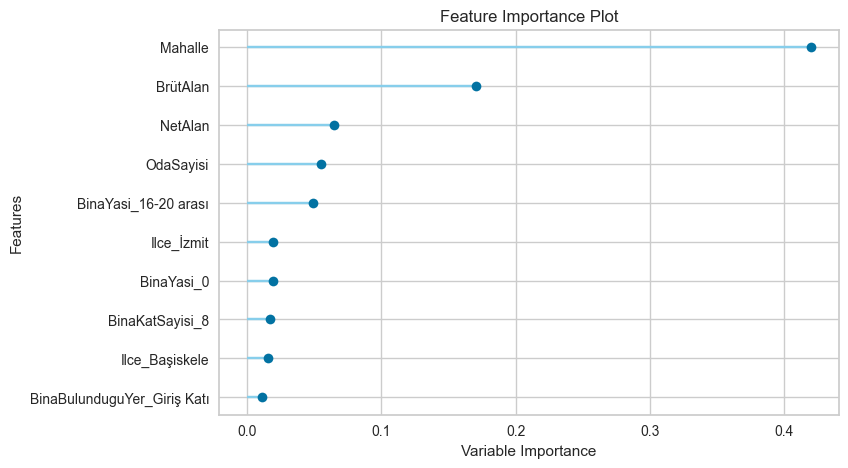

In [37]:
plot_model(best_model,plot="feature")